In [33]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import datetime

In [10]:
# define instruments to download
companies_dict = {
'American Express Co':	'AXP',
'Amgen Inc':	'AMGN',
'Apple Inc':	'AAPL',
'Boeing Co':	'BA',
'Caterpillar Inc':	'CAT',
'Cisco Systems Inc':	'CSCO',
'Chevron Corp':	'CVX',
'Goldman Sachs Group Inc':	'GS',
'Home Depot Inc':	'HD',
'Honeywell International Inc':	'HON',
'International Business Machines Corp':	'IBM',
'Intel Corp':	'INTC',
'Johnson & Johnson':	'JNJ',
'Coca-Cola Co':	'KO',
'JPMorgan Chase & Co':	'JPM',
'McDonald’s Corp':	'MCD',
'Merck & Co Inc':	'MRK',
'Microsoft Corp':	'MSFT',
'Nike Inc':	'NKE',
'Procter & Gamble Co':	'PG',
'Travelers Companies Inc':	'TRV',
'UnitedHealth Group Inc':	'UNH',
'Salesforce.Com Inc':	'CRM',
'Verizon Communications Inc':	'VZ',
'Visa Inc':	'V',
'Walgreens Boots Alliance Inc':	'WBA',
'Walmart Inc':	'WMT',
'Walt Disney Co':	'DIS',
'Dow Inc':'DOW'

}
companies = sorted(companies_dict.items(), key=lambda x: x[1])


In [11]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '2020-01-01'
end_date = '2021-01-01'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

[DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None), MultiIndex([('Adj Close',  'AXP'),
            ('Adj Close', 'AMGN'),
            ('Adj Close', 'AAPL'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'CAT'),
            ('Adj Close', 'CSCO'),
            ('Adj Close',  'CVX'),
            ('Adj Close',   'GS'),
            ('Adj Close',   'HD'),
            ('Adj Close',  'HON'),
            ...
            (   'Volume',   'PG'),
            (   'Volume',  'TRV'),
            (   'Volume',  'UNH'),
            (   'Volume',  'CRM'),
            (   'Volume',   

In [12]:

# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

Symbols
AXP     125.849998
AMGN    240.100006
AAPL     75.087502
BA      333.320007
CAT     150.529999
CSCO     48.419998
CVX     121.430000
GS      234.320007
HD      219.660004
HON     180.789993
IBM     135.419998
INTC     60.840000
JNJ     145.970001
KO       54.990002
JPM     141.089996
MCD     200.789993
MRK      87.824425
MSFT    160.619995
NKE     102.199997
PG      123.410004
TRV     137.509995
UNH     292.500000
CRM     166.990005
VZ       61.049999
V       191.119995
WBA      59.080002
WMT     118.940002
DIS     148.199997
DOW      53.750000
Name: 2020-01-02 00:00:00, dtype: float64


In [13]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [14]:
for i in range(0, len(companies)):
 print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))


Company: Apple Inc, Change: -15.679901123046875
Company: Amgen Inc, Change: 22.130035400390625
Company: American Express Co, Change: 20.089900970458984
Company: Boeing Co, Change: -252.5400161743164
Company: Caterpillar Inc, Change: 37.17010498046875
Company: Salesforce.Com Inc, Change: 3.2499961853027344
Company: Cisco Systems Inc, Change: -32.509979248046875
Company: Chevron Corp, Change: 13.140060424804688
Company: Walt Disney Co, Change: 25.3597412109375
Company: Dow Inc, Change: 28.159950256347656
Company: Goldman Sachs Group Inc, Change: -7.24005126953125
Company: Home Depot Inc, Change: 6.959972381591797
Company: Honeywell International Inc, Change: -6.1299591064453125
Company: International Business Machines Corp, Change: -12.35000991821289
Company: Intel Corp, Change: -21.84003448486328
Company: Johnson & Johnson, Change: 25.690216064453125
Company: JPMorgan Chase & Co, Change: -15.076309204101562
Company: Coca-Cola Co, Change: 29.32000732421875
Company: McDonald’s Corp, Chang

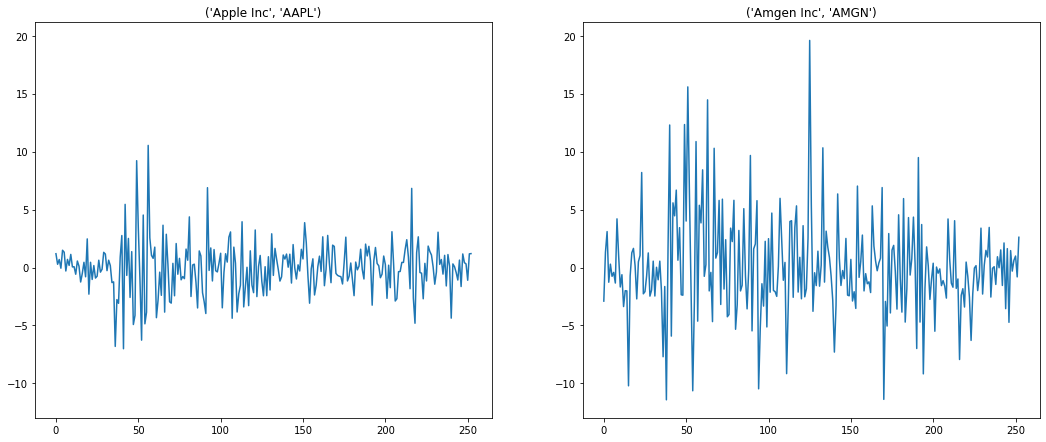

In [15]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [16]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.3740701140024008
-0.3603647500853186
1.4224598385282188e-05


In [17]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [18]:
panel_data

Attributes   Adj Close                                                  \
Symbols            AXP        AMGN        AAPL          BA         CAT   
Date                                                                     
2020-01-02  122.641556  228.533554   74.096451  331.348572  143.928116   
2020-01-03  121.423416  226.982056   73.376076  330.791901  141.929794   
2020-01-06  120.897171  228.723923   73.960770  331.766083  141.834152   
2020-01-07  120.263763  226.572769   73.612915  335.285156  139.960144   
2020-01-08  122.339455  226.744110   74.797073  329.410095  141.203110   
...                ...         ...         ...         ...         ...   
2020-12-24  115.997734  218.055725  131.352829  217.149994  176.856873   
2020-12-28  116.996094  218.759995  136.050766  216.089996  175.684784   
2020-12-29  116.778633  221.909576  134.239273  216.250000  173.990662   
2020-12-30  118.053757  222.203033  133.094666  216.669998  177.329636   
2020-12-31  119.516708  224.892914  132.069473  214.059998  179.279831   

Attributes                                                             ...  \
Symbols          CSCO         CVX          GS          HD         HON  ...   
Date                                                                   ...   
2020-01-02  45.812050  110.457169  226.048447  211.075027  174.451218  ...   
2020-01-03  45.064598  110.075119  223.405151  210.373535  172.588882  ...   
2020-01-06  45.225441  109.702164  225.691498  211.363312  171.286224  ...   
2020-01-07  44.932140  108.301323  227.177139  209.979568  171.382706  ...   
2020-01-08  44.960526  107.064224  229.366989  213.121780  171.527435  ...   
...               ...         ...         ...         ...         ...  ...   
2020-12-24  43.271156   82.017365  253.069214  266.473633  206.899994  ...   
2020-12-28  43.640331   81.604065  256.457825  264.831024  207.304855  ...   
2020-12-29  43.368305   81.325317  254.896912  261.821259  206.505035  ...   
2020-12-30  43.212864   82.017365  256.319489  260.906525  208.302185  ...   
2020-12-31  43.475174   81.171524  260.528107  261.260620  210.030212  ...   

Attributes     Volume                                               \
Symbols            PG        TRV        UNH        CRM          VZ   
Date                                                                 
2020-01-02  8130800.0  1117300.0  2543400.0  5189300.0  11447900.0   
2020-01-03  7970500.0   927300.0  2711400.0  3205400.0  13263200.0   
2020-01-06  6674400.0   952800.0  3079100.0  8836200.0  15094500.0   
2020-01-07  7583400.0  1204600.0  2492900.0  8272700.0  14293100.0   
2020-01-08  5385100.0  1942800.0  3379200.0  7225100.0  15926500.0   
...               ...        ...        ...        ...         ...   
2020-12-24  2588200.0   416800.0  1360600.0  6146300.0   7751100.0   
2020-12-28  3714700.0  1100300.0  2308200.0  6422500.0  15355600.0   
2020-12-29  5139300.0   859000.0  2275700.0  6122400.0  15686100.0   
2020-12-30  3261400.0  1253800.0  1866000.0  4724000.0  18259800.0   
2020-12-31  4076400.0   970200.0  1969000.0  6011100.0  12906300.0   

Attributes                                                            
Symbols              V         WBA        WMT         DIS        DOW  
Date                                                                  
2020-01-02   8733000.0   5700500.0  6764900.0   9502100.0  5145200.0  
2020-01-03   4899700.0   4892300.0  5399200.0   7320200.0  5004300.0  
2020-01-06  10109500.0   6003300.0  6445500.0   8262500.0  4293100.0  
2020-01-07   4392300.0   4365700.0  6846900.0   6906500.0  5122800.0  
2020-01-08   5712000.0  17431800.0  5875800.0   6984200.0  3629700.0  
...                ...         ...        ...         ...        ...  
2020-12-24   3367900.0   2678000.0  3018200.0   2721000.0  1074700.0  
2020-12-28   5816200.0   4714500.0  6448300.0  13145400.0  3668200.0  
2020-12-29   6093400.0   4004400.0  5979400.0   6875400.0  2222000.0  
2020-12-30   8875100.0   4194300.0  6

In [19]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [20]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                                    companies
26       0             (Verizon Communications Inc, VZ)
25       1                                (Visa Inc, V)
5        1                    (Salesforce.Com Inc, CRM)
11       1                         (Home Depot Inc, HD)
10       1                (Goldman Sachs Group Inc, GS)
21       2                              (Nike Inc, NKE)
3        3                              (Boeing Co, BA)
24       3                (UnitedHealth Group Inc, UNH)
27       3          (Walgreens Boots Alliance Inc, WBA)
0        4                            (Apple Inc, AAPL)
14       4                           (Intel Corp, INTC)
7        4                          (Chevron Corp, CVX)
6        4                    (Cisco Systems Inc, CSCO)
2        5                   (American Express Co, AXP)
17       5                           (Coca-Cola Co, KO)
22       5                    (Procter & Gamble Co, PG)
8        6                        (Walt Disney C

In [40]:
display(new)

array([[ 0.03314003,  0.00779765,  0.01921559, ..., -0.03063373,
         0.03286169,  0.03341879],
       [-0.0423444 ,  0.01912799,  0.04526488, ...,  0.01445539,
        -0.01182722,  0.03811004],
       [ 0.03400664,  0.00231674,  0.04972711, ..., -0.10524669,
        -0.06155925, -0.04600392],
       ...,
       [ 0.002509  , -0.01191737,  0.00784043, ..., -0.0420246 ,
        -0.02195359, -0.00156818],
       [ 0.07945413,  0.00273055,  0.00300343, ..., -0.07399304,
         0.07290107, -0.00109238],
       [-0.09287522, -0.0433001 , -0.00690293, ..., -0.01066799,
         0.07028414,  0.00188253]])

In [44]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labbels
print(df.sort_values('labels'))

    labels                                    companies
24       0                (UnitedHealth Group Inc, UNH)
2        0                   (American Express Co, AXP)
22       0                    (Procter & Gamble Co, PG)
21       0                              (Nike Inc, NKE)
18       0                       (McDonald’s Corp, MCD)
17       0                           (Coca-Cola Co, KO)
8        0                        (Walt Disney Co, DIS)
15       0                     (Johnson & Johnson, JNJ)
0        1                            (Apple Inc, AAPL)
20       1                       (Microsoft Corp, MSFT)
27       1          (Walgreens Boots Alliance Inc, WBA)
14       1                           (Intel Corp, INTC)
28       1                           (Walmart Inc, WMT)
10       1                (Goldman Sachs Group Inc, GS)
9        1                               (Dow Inc, DOW)
7        1                          (Chevron Corp, CVX)
6        1                    (Cisco Systems Inc

In [24]:
reduced_data


array([[ 0.52123901, -0.03280421],
       [-0.44351665, -0.09320077],
       [-0.28764448,  0.38776249],
       [ 0.38669546,  0.05104003],
       [ 0.28130294, -0.20928885],
       [-0.2054001 , -0.00772722],
       [ 0.41892485,  0.00164321],
       [ 0.37695462,  0.00578198],
       [-0.1195987 ,  0.39313688],
       [ 0.32146446, -0.10402955],
       [ 0.06791621, -0.18731157],
       [-0.28437022,  0.03215892],
       [-0.38465956, -0.3411189 ],
       [-0.0542893 , -0.35024604],
       [ 0.48578653, -0.14606706],
       [ 0.09442768,  0.36497898],
       [-0.26200256, -0.16592224],
       [-0.3573888 ,  0.37943805],
       [ 0.03606951,  0.25823246],
       [-0.41809026, -0.27737516],
       [ 0.23691527,  0.05114774],
       [-0.10998681,  0.07854443],
       [-0.20996289,  0.60588434],
       [-0.23386126, -0.33258358],
       [ 0.03783099,  0.23791612],
       [-0.11776871, -0.50772317],
       [-0.50873576, -0.12872805],
       [ 0.29772309,  0.19608063],
       [ 0.43402542,

In [25]:
data_df = pd.DataFrame(reduced_data, columns=["PC 1", "PC 2"])
print(data_df.shape)
data_df.head(10)

(29, 2)


,PC 1,PC 2
0,0.521239,-0.032804
1,-0.443517,-0.093201
2,-0.287644,0.387762
3,0.386695,0.051040
4,0.281303,-0.209289
5,-0.205400,-0.007727
6,0.418925,0.001643
7,0.376955,0.005782
8,-0.119599,0.393137
9,0.321464,-0.104030


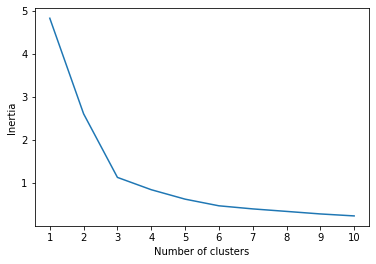

In [41]:
# Initialize empty inertia list
distortions=[]
inertia = []
# Initialize k range
k = list(range(1,11))
# Looping through k list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(reduced_data)
    distortions.append(sum(np.min(cdist(reduced_data, km.cluster_centers_,
                                        'euclidean'), axis=1)) / new.shape[0])
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<Figure size 432x288 with 0 Axes>

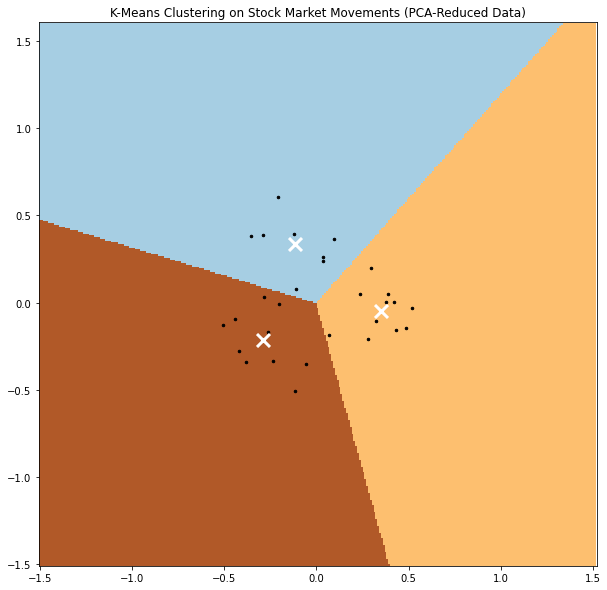

In [45]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()